# 10/09/2025

In [250]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

### Line Fitting/ Curve Fitting (continued)
> used `numpy` method to get linear least squares coefficients
> plotted data, best fit line, and error bars

In [251]:
npoints = 50
x = np.linspace(0., 2*np.pi, npoints)

a, b, c, d, sig = 3.4, 2.1, 0.27, -1.3, 0.6

np.random.seed(119)
y = a * np.sin(b*x + c) + d + np.random.normal(scale=sig, size=npoints)
y_err = np.full(npoints, sig)

if 0:
    fig = plt.figure(figsize=(7, 7))
    plt.errorbar(x, y, y_err, fmt='o')
    plt.xlabel('x')
    plt.ylabel('y')

In [252]:
from scipy import optimize

# equation to be optimized, passed to scipy.optimize.curve_fit


def f_line(x, a, b, c, d):
    return a*np.sin(b*x + c) + d


params, param_cov = optimize.curve_fit(
    f_line,              # equation to be optimized
    x,                   # x data
    y,                   # y data
    sigma=y_err,         # std deviation of y data
    # initial guesses for params
    p0=[1, 2., 0.1, -.1]
)

a_fit, b_fit, c_fit, d_fit = params
if print_params := False:
    for i in 'abcd':
        print(f'{i}:\n  {i}_fit = {eval(i+'_fit')}\n  {i}     = {eval(i)}')
        print(f'  delta = {abs((eval(i+'_fit')-eval(i))/eval(i)):.2%}')

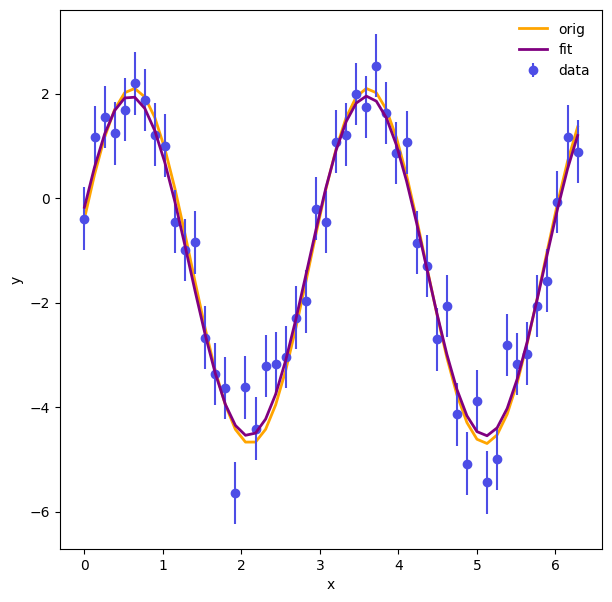

In [ ]:
fig = plt.figure(figsize=(7, 7))
plt.errorbar(x, y, yerr=y_err,
             fmt='o', color=(0.3, 0.3, 0.9),
             label='data', zorder=1)

plt.plot(x, f_line(x, a, b, c, d),
         linewidth=2, color='orange',
         label='orig', zorder=0)

y_fit = a_fit*np.sin(b_fit*x+c_fit)+d
plt.plot(x, y_fit,
         linewidth=2, color='purple',
         label='fit', zorder=2)

_ = plt.xlabel('x')
_ = plt.ylabel('y')
_ = plt.legend(loc=0, frameon=False)